In [64]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
from MCForecastTools import MCSimulation

%matplotlib inline

In [65]:
# Reading hash returns
global_hash_path = Path("Resources/export.csv")
hash_df = pd.read_csv(global_hash_path, index_col="date", parse_dates=True, infer_datetime_format=True)
hash_df.head()

/var/folders/5m/7yfwqfkn3hs5pf3sylkksfc40000gn/T/ipykernel_6293/432031655.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  hash_df = pd.read_csv(global_hash_path, index_col="date", parse_dates=True, infer_datetime_format=True)


,country,monthly_hashrate_%,monthly_absolute_hashrate_EH/S
date,,,
2019-09-01,Mainland China,75.53%,66.76
2019-09-01,Other,6.1%,5.39
2019-09-01,Russian Federation,5.93%,5.24
2019-09-01,United States,4.06%,3.59
2019-09-01,Malaysia,3.25%,2.88


In [66]:
# Cleaning the data
hash_df.isnull().sum()
hash_df.isnull().sum() / len(hash_df) * 100
hash_df.dropna(inplace=True)
hash_df.sort_index(inplace=True)
hash_df.head()

,country,monthly_hashrate_%,monthly_absolute_hashrate_EH/S
date,,,
2019-09-01,Mainland China,75.53%,66.76
2019-09-01,Other,6.1%,5.39
2019-09-01,Russian Federation,5.93%,5.24
2019-09-01,United States,4.06%,3.59
2019-09-01,Malaysia,3.25%,2.88


In [67]:
# Cleaning the data / drop monthly hash rate column
hash_df = hash_df.drop(columns=["monthly_hashrate_%"])
hash_df.head(10)

,country,monthly_absolute_hashrate_EH/S
date,,
2019-09-01,Mainland China,66.76
2019-09-01,Other,5.39
2019-09-01,Russian Federation,5.24
2019-09-01,United States,3.59
2019-09-01,Malaysia,2.88
2019-09-01,"Iran, Islamic Rep.",1.54
2019-09-01,Kazakhstan,1.26
2019-09-01,Canada,0.94
2019-09-01,Germany *,0.80


In [68]:
# Cleaning the data specific to country
# Mainland China
hash_df_China = hash_df.loc[hash_df['country'] == 'Mainland China'].copy()
hash_df_China.head()
# Other
hash_df_Other = hash_df.loc[hash_df['country'] == 'Other'].copy()
hash_df_Other.head(10)
# Russian Federation
hash_df_Russia = hash_df.loc[hash_df['country'] == 'Russian Federation'].copy()
hash_df_Russia.head(10)
# United States
hash_df_US = hash_df.loc[hash_df['country'] == 'United States'].copy()
hash_df_US.head(10)
# Malaysia
hash_df_Malaysia = hash_df.loc[hash_df['country'] == 'Malaysia'].copy()
hash_df_Malaysia.head(10)
# Iran
hash_df_Iran = hash_df.loc[hash_df['country'] == 'Iran, Islamic Rep.'].copy()
hash_df_Iran.head(10)
# Kazakhstan
hash_df_Kazakhstan = hash_df.loc[hash_df['country'] == 'Kazakhstan'].copy()
hash_df_Kazakhstan.head(10)
# Kazakhstan
hash_df_Canada = hash_df.loc[hash_df['country'] == 'Canada'].copy()
hash_df_Canada.head(10)
# Germany
hash_df_Germany = hash_df.loc[hash_df['country'] == 'Germany *'].copy()
hash_df_Germany.head(10)
# Germany
hash_df_Ireland = hash_df.loc[hash_df['country'] == 'Ireland *'].copy()
hash_df_Ireland.fillna(0, inplace=True)
#hash_df_Ireland_returns = hash_df_Ireland.pct_change(['monthly_absolute_hashrate_EH/S'])
hash_df_Ireland_returns = hash_df_Ireland.iloc[:,1].pct_change()
hash_df_Ireland_returns.head(100)

date
2019-09-01          NaN
2019-10-01          NaN
2019-11-01          NaN
2019-12-01          NaN
2020-01-01          NaN
2020-02-01          NaN
2020-03-01          NaN
2020-04-01          NaN
2020-05-01          NaN
2020-06-01          inf
2020-07-01    -0.500000
2020-08-01     3.000000
2020-09-01    46.750000
2020-10-01     0.732984
2020-11-01     0.196375
2020-12-01     0.063131
2021-01-01    -0.083135
2021-02-01    -0.163212
2021-03-01     0.024768
2021-04-01     0.078550
2021-05-01     0.014006
2021-06-01    -0.052486
2021-07-01     0.481050
2021-08-01     0.112205
2021-09-01    -0.479646
2021-10-01     0.180272
2021-11-01    -0.002882
2021-12-01     0.028902
2022-01-01     0.036517
Name: monthly_absolute_hashrate_EH/S, dtype: float64

/Users/michael/anaconda3/envs/dev/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


<Axes: xlabel='date'>

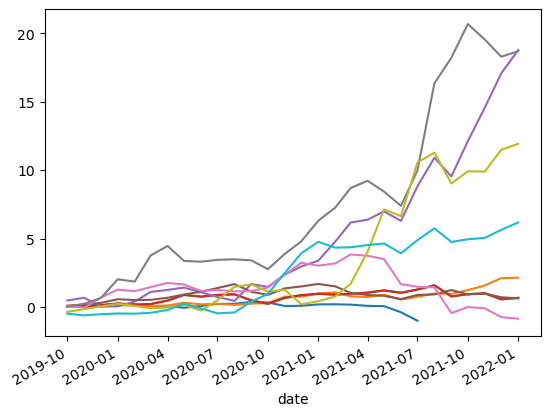

In [69]:
#Calculate China daily returns and cumulative returns
China_returns = hash_df_China.iloc[:,1].pct_change()
China_returns.dropna(inplace=True)
China_returns.head(20)
#Calculate cumulative returns
cumulative_China_returns = (1 + China_returns).cumprod() - 1
cumulative_China_returns.plot()

#Calculate Other daily returns and cumulative returns
Other_returns = hash_df_Other.iloc[:,1].pct_change()
Other_returns.dropna(inplace=True)
Other_returns.head(20)
#Calculate cumulative returns
cumulative_Other_returns = (1 + Other_returns).cumprod() - 1
cumulative_Other_returns.plot()

#Calculate Russia daily returns and cumulative returns
Russia_returns = hash_df_Russia.iloc[:,1].pct_change()
Russia_returns.dropna(inplace=True)
Russia_returns.head(20)
#Calculate cumulative returns
cumulative_Russia_returns = (1 + Russia_returns).cumprod() - 1
cumulative_Russia_returns.plot()

#Calculate Russia daily returns and cumulative returns
Russia_returns = hash_df_Russia.iloc[:,1].pct_change()
Russia_returns.dropna(inplace=True)
Russia_returns.head(20)
#Calculate cumulative returns
cumulative_Russia_returns = (1 + Russia_returns).cumprod() - 1
cumulative_Russia_returns.plot()

#Calculate US daily returns and cumulative returns
US_returns = hash_df_US.iloc[:,1].pct_change()
US_returns.dropna(inplace=True)
US_returns.head(20)
#Calculate cumulative returns
cumulative_US_returns = (1 + US_returns).cumprod() - 1
cumulative_US_returns.plot()

#Calculate Malaysia daily returns and cumulative returns
Malaysia_returns = hash_df_Malaysia.iloc[:,1].pct_change()
Malaysia_returns.dropna(inplace=True)
Malaysia_returns.head(20)
#Calculate cumulative returns
cumulative_Malaysia_returns = (1 + Malaysia_returns).cumprod() - 1
cumulative_Malaysia_returns.plot()

#Calculate Iran daily returns and cumulative returns
Iran_returns = hash_df_Iran.iloc[:,1].pct_change()
Iran_returns.dropna(inplace=True)
Iran_returns.head(20)
#Calculate cumulative returns
cumulative_Iran_returns = (1 + Iran_returns).cumprod() - 1
cumulative_Iran_returns.plot()

#Calculate Kazakhstan daily returns and cumulative returns
Kazakhstan_returns = hash_df_Kazakhstan.iloc[:,1].pct_change()
Kazakhstan_returns.dropna(inplace=True)
Kazakhstan_returns.head(20)
#Calculate cumulative returns
cumulative_Kazakhstan_returns = (1 + Kazakhstan_returns).cumprod() - 1
cumulative_Kazakhstan_returns.plot()

#Calculate Canada daily returns and cumulative returns
Canada_returns = hash_df_Canada.iloc[:,1].pct_change()
Canada_returns.dropna(inplace=True)
Canada_returns.head(20)
#Calculate cumulative returns
cumulative_Canada_returns = (1 + Canada_returns).cumprod() - 1
cumulative_Canada_returns.plot()

#Calculate Germany daily returns and cumulative returns
Germany_returns = hash_df_Germany.iloc[:,1].pct_change()
Germany_returns.dropna(inplace=True)
Germany_returns.head(20)
#Calculate cumulative returns
cumulative_Germany_returns = (1 + Germany_returns).cumprod() - 1
cumulative_Germany_returns.plot()

#Calculate Ireland daily returns and cumulative returns
Ireland_returns = hash_df_Ireland.iloc[:,1].pct_change()
Ireland_returns.dropna(inplace=True)
Ireland_returns.head(20)
#Calculate cumulative returns
cumulative_Ireland_returns = (1 + Ireland_returns).cumprod() - 1
cumulative_Ireland_returns.plot()


In [70]:
#New Data Frame / Cumulative returns
combined_df = pd.concat([China_returns, Other_returns, Russia_returns, US_returns, Malaysia_returns, Iran_returns, Kazakhstan_returns, Canada_returns, Germany_returns, Ireland_returns], axis="columns", join="outer")
countries = ['China', 'Other', 'Russia', 'US', 'Malaysia', 'Iran', 'Kazakhstan', 'Canada', 'Germany', 'Ireland']
combined_df.columns = countries
combined_df.head(40)

,China,Other,Russia,US,Malaysia,Iran,Kazakhstan,Canada,Germany,Ireland
date,,,,,,,,,,
2019-10-01,0.063960,0.109462,0.062977,0.476323,0.076389,0.090909,0.031746,-0.351064,-0.487500,NaN
2019-11-01,-0.067859,0.020067,0.026930,0.135849,0.080645,-0.130952,0.200000,0.295082,-0.243902,NaN
2019-12-01,0.058148,-0.029508,0.038462,-0.387043,0.116418,0.773973,0.333333,0.240506,0.225806,NaN
2020-01-01,0.133457,0.027027,0.111111,0.018970,0.208556,0.351351,0.831731,0.183673,0.105263,NaN
2020-02-01,0.014860,-0.016447,-0.069697,0.335106,-0.037611,-0.051429,-0.055118,-0.120690,-0.023810,NaN
2020-03-01,-0.110932,-0.031773,0.037459,0.503984,0.009195,0.135542,0.666667,-0.166667,0.121951,NaN
2020-04-01,0.007537,0.029361,0.207221,0.068874,0.097950,0.127321,0.146667,0.070588,0.369565,NaN
2020-05-01,-0.128827,0.192953,0.283485,0.076828,0.143154,-0.042353,-0.200581,0.186813,0.587302,NaN
2020-06-01,0.147877,-0.095640,-0.066869,-0.140391,0.107078,-0.176904,-0.012727,-0.351852,-0.280000,inf


In [73]:
combined_df_2 = pd.concat([hash_df_China, hash_df_Other, hash_df_Russia, hash_df_US, hash_df_Malaysia, hash_df_Iran, hash_df_Kazakhstan, hash_df_Canada, hash_df_Germany, hash_df_Ireland], axis="columns", join="outer")
combined_df_2.columns = ["C1", 'China', "C2", 'Other', "C3", 'Russia', "C4", 'US', "C5", 'Malaysia', "C6", 'Iran', "C7", 'Kazakhstan', "C8", 'Canada', "C9", 'Germany', "C10", 'Ireland']
combined_df_2 = combined_df_2.drop(columns=['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10'])

# Create a list of tuples.
tuples = [('China', 'close'), ('Other', 'close'), ('Russia', 'close'), ('US', 'close'), ('Malaysia', 'close'), ('Iran', 'close'), ('kazakhstan', 'close'), ('Canada', 'close'), ('Germany', 'close'), ('Ireland', 'close')]

# Create a MultiIndex from the list of tuples.
index = pd.MultiIndex.from_tuples(tuples)

combined_df_2.columns = index


combined_df_2.head(40)

,China,Other,Russia,US,Malaysia,Iran,kazakhstan,Canada,Germany,Ireland
,close,close,close,close,close,close,close,close,close,close
date,,,,,,,,,,
2019-09-01,66.76,5.39,5.24,3.59,2.88,1.54,1.26,0.94,0.80,0.00
2019-10-01,71.03,5.98,5.57,5.30,3.10,1.68,1.30,0.61,0.41,0.00
2019-11-01,66.21,6.10,5.72,6.02,3.35,1.46,1.56,0.79,0.31,0.00
2019-12-01,70.06,5.92,5.94,3.69,3.74,2.59,2.08,0.98,0.38,0.00
2020-01-01,79.41,6.08,6.60,3.76,4.52,3.50,3.81,1.16,0.42,0.00
2020-02-01,80.59,5.98,6.14,5.02,4.35,3.32,3.60,1.02,0.41,0.00
2020-03-01,71.65,5.79,6.37,7.55,4.39,3.77,6.00,0.85,0.46,0.00
2020-04-01,72.19,5.96,7.69,8.07,4.82,4.25,6.88,0.91,0.63,0.00


In [74]:
combined_df = combined_df.fillna(0)
combined_df = combined_df.replace([np.inf, -np.inf], 0)
combined_df

,China,Other,Russia,US,Malaysia,Iran,Kazakhstan,Canada,Germany,Ireland
date,,,,,,,,,,
2019-10-01,0.063960,0.109462,0.062977,0.476323,0.076389,0.090909,0.031746,-0.351064,-0.487500,0.000000
2019-11-01,-0.067859,0.020067,0.026930,0.135849,0.080645,-0.130952,0.200000,0.295082,-0.243902,0.000000
2019-12-01,0.058148,-0.029508,0.038462,-0.387043,0.116418,0.773973,0.333333,0.240506,0.225806,0.000000
2020-01-01,0.133457,0.027027,0.111111,0.018970,0.208556,0.351351,0.831731,0.183673,0.105263,0.000000
2020-02-01,0.014860,-0.016447,-0.069697,0.335106,-0.037611,-0.051429,-0.055118,-0.120690,-0.023810,0.000000
2020-03-01,-0.110932,-0.031773,0.037459,0.503984,0.009195,0.135542,0.666667,-0.166667,0.121951,0.000000
2020-04-01,0.007537,0.029361,0.207221,0.068874,0.097950,0.127321,0.146667,0.070588,0.369565,0.000000
2020-05-01,-0.128827,0.192953,0.283485,0.076828,0.143154,-0.042353,-0.200581,0.186813,0.587302,0.000000
2020-06-01,0.147877,-0.095640,-0.066869,-0.140391,0.107078,-0.176904,-0.012727,-0.351852,-0.280000,0.000000


In [75]:
dfs_to_concat = [
    China_returns, Other_returns, Russia_returns, US_returns, Malaysia_returns,
    Iran_returns, Kazakhstan_returns, Canada_returns, Germany_returns, Ireland_returns
]
country_names = [
    'China', 'Other', 'Russia', 'US', 'Malaysia',
    'Iran', 'Kazakhstan', 'Canada', 'Germany', 'Ireland'
]
multi_index = pd.MultiIndex.from_product([country_names, ['close']], names=['Country', 'Data'])
combined_df = pd.concat(dfs_to_concat, axis="columns")
combined_df.columns = multi_index

            China              Other              Russia                 US  \
            close daily_return close daily_return  close daily_return close   
date                                                                          
2019-09-01  66.76          NaN  5.39          NaN   5.24          NaN  3.59   
2019-10-01  71.03     0.063960  5.98     0.109462   5.57     0.062977  5.30   
2019-11-01  66.21    -0.067859  6.10     0.020067   5.72     0.026930  6.02   
2019-12-01  70.06     0.058148  5.92    -0.029508   5.94     0.038462  3.69   
2020-01-01  79.41     0.133457  6.08     0.027027   6.60     0.111111  3.76   

                        Malaysia               Iran              kazakhstan  \
           daily_return    close daily_return close daily_return      close   
date                                                                          
2019-09-01          NaN     2.88          NaN  1.54          NaN       1.26   
2019-10-01     0.476323     3.10     0.076389  1.68

/Users/michael/Project-1-.-/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michael/Project-1-.-/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michael/Project-1-.-/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.


/Users/michael/Project-1-.-/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michael/Project-1-.-/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michael/Project-1-.-/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.
Running Monte Carlo simulation number 360.


/Users/michael/Project-1-.-/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michael/Project-1-.-/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michael/Project-1-.-/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

Running Monte Carlo simulation number 370.
Running Monte Carlo simulation number 380.
Running Monte Carlo simulation number 390.
Running Monte Carlo simulation number 400.
Running Monte Carlo simulation number 410.
Running Monte Carlo simulation number 420.
Running Monte Carlo simulation number 430.
Running Monte Carlo simulation number 440.
Running Monte Carlo simulation number 450.


/Users/michael/Project-1-.-/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michael/Project-1-.-/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michael/Project-1-.-/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

Running Monte Carlo simulation number 460.
Running Monte Carlo simulation number 470.
Running Monte Carlo simulation number 480.
Running Monte Carlo simulation number 490.
Running Monte Carlo simulation number 500.
Running Monte Carlo simulation number 510.
Running Monte Carlo simulation number 520.
Running Monte Carlo simulation number 530.
Running Monte Carlo simulation number 540.
Running Monte Carlo simulation number 550.


/Users/michael/Project-1-.-/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michael/Project-1-.-/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michael/Project-1-.-/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

Running Monte Carlo simulation number 560.
Running Monte Carlo simulation number 570.
Running Monte Carlo simulation number 580.
Running Monte Carlo simulation number 590.
Running Monte Carlo simulation number 600.
Running Monte Carlo simulation number 610.
Running Monte Carlo simulation number 620.
Running Monte Carlo simulation number 630.
Running Monte Carlo simulation number 640.


/Users/michael/Project-1-.-/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michael/Project-1-.-/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michael/Project-1-.-/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

Running Monte Carlo simulation number 650.
Running Monte Carlo simulation number 660.
Running Monte Carlo simulation number 670.
Running Monte Carlo simulation number 680.
Running Monte Carlo simulation number 690.
Running Monte Carlo simulation number 700.
Running Monte Carlo simulation number 710.
Running Monte Carlo simulation number 720.
Running Monte Carlo simulation number 730.


/Users/michael/Project-1-.-/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michael/Project-1-.-/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michael/Project-1-.-/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

Running Monte Carlo simulation number 740.
Running Monte Carlo simulation number 750.
Running Monte Carlo simulation number 760.
Running Monte Carlo simulation number 770.
Running Monte Carlo simulation number 780.
Running Monte Carlo simulation number 790.
Running Monte Carlo simulation number 800.
Running Monte Carlo simulation number 810.
Running Monte Carlo simulation number 820.


/Users/michael/Project-1-.-/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michael/Project-1-.-/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michael/Project-1-.-/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

Running Monte Carlo simulation number 830.
Running Monte Carlo simulation number 840.
Running Monte Carlo simulation number 850.
Running Monte Carlo simulation number 860.
Running Monte Carlo simulation number 870.
Running Monte Carlo simulation number 880.
Running Monte Carlo simulation number 890.
Running Monte Carlo simulation number 900.
Running Monte Carlo simulation number 910.


/Users/michael/Project-1-.-/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michael/Project-1-.-/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michael/Project-1-.-/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

Running Monte Carlo simulation number 920.
Running Monte Carlo simulation number 930.
Running Monte Carlo simulation number 940.
Running Monte Carlo simulation number 950.
Running Monte Carlo simulation number 960.
Running Monte Carlo simulation number 970.
Running Monte Carlo simulation number 980.
Running Monte Carlo simulation number 990.


/Users/michael/Project-1-.-/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michael/Project-1-.-/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michael/Project-1-.-/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

count           1000.000000
mean               9.655115
std                4.102924
min                2.954505
25%                6.758854
50%                8.852706
75%               11.814417
max               31.914879
95% CI Lower       3.882133
95% CI Upper      19.765959
Name: 36, dtype: float64


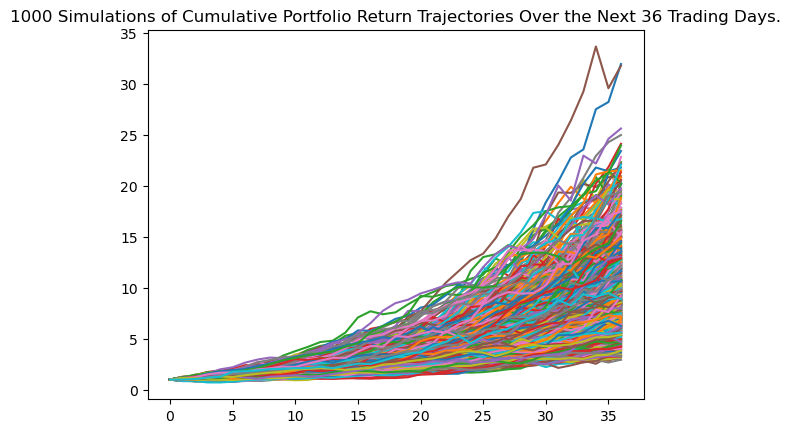

In [76]:


# Configuring a Monte Carlo simulation to forecast 35 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = combined_df_2,
    
    num_simulation = 1000,
    num_trading_days = 12 * 3 # Typically use 252 trading days for stocks, adjust if needed
)
# Printing the simulation input data
print(MC_thirtyyear.portfolio_data.head())
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()
# Save the plot for future usage
line_plot.get_figure().savefig("MC_thirtyyear_sim_plot.png", bbox_inches="tight")
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()
# Print summary statistics
print(tbl)

In [77]:
hash_df_China.head()

,country,monthly_absolute_hashrate_EH/S
date,,
2019-09-01,Mainland China,66.76
2019-10-01,Mainland China,71.03
2019-11-01,Mainland China,66.21
2019-12-01,Mainland China,70.06
2020-01-01,Mainland China,79.41
